# Prediction Errors for Mammal Specific Model

In [1]:
data_reported_filename = 'Table S[db_age_mat].csv'
config_filepath = '../config/config_mammalshomo.yaml'
config_pred_filepath = '../config/config_pred_mammalshomo.yaml'

In [2]:
import sys
sys.path.append("..")

from pathlib import Path
import pandas as pd
import life_pi.lib.generate_pi as generate_pi
import life_pi.lib.plot_utils as plot_utils
from life_pi.lib.get_config import get_config
cfg = get_config(config_filepath)

data_dir = Path('..', cfg['data_dir'])
output_dir = Path('..', cfg['output_dir'])
plot_dir = Path('../figures', output_dir.stem)
plot_dir.mkdir(parents=True, exist_ok=True)
print(f"Confidence level >> {(1-cfg['alpha'])*100}%")

Load config file >> ../config/config_mammalshomo.yaml
Confidence level >> 90.0%


In [3]:
# Load reported lifespan data
df_datareport = pd.read_csv(Path(data_dir, data_reported_filename))
df_datareport['mean_'+cfg['y_labelname']] = df_datareport.groupby('organism_name')['age_mat'].transform('mean') # Add mean_age_mat
df_datareport = df_datareport.groupby('organism_name', group_keys=True).apply(lambda x: x)

## All Dataset

PARTITION # 1
PARTITION # 2
PARTITION # 3
PARTITION # 4
PARTITION # 5
PARTITION # 7
PARTITION # 8
PARTITION # 10


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


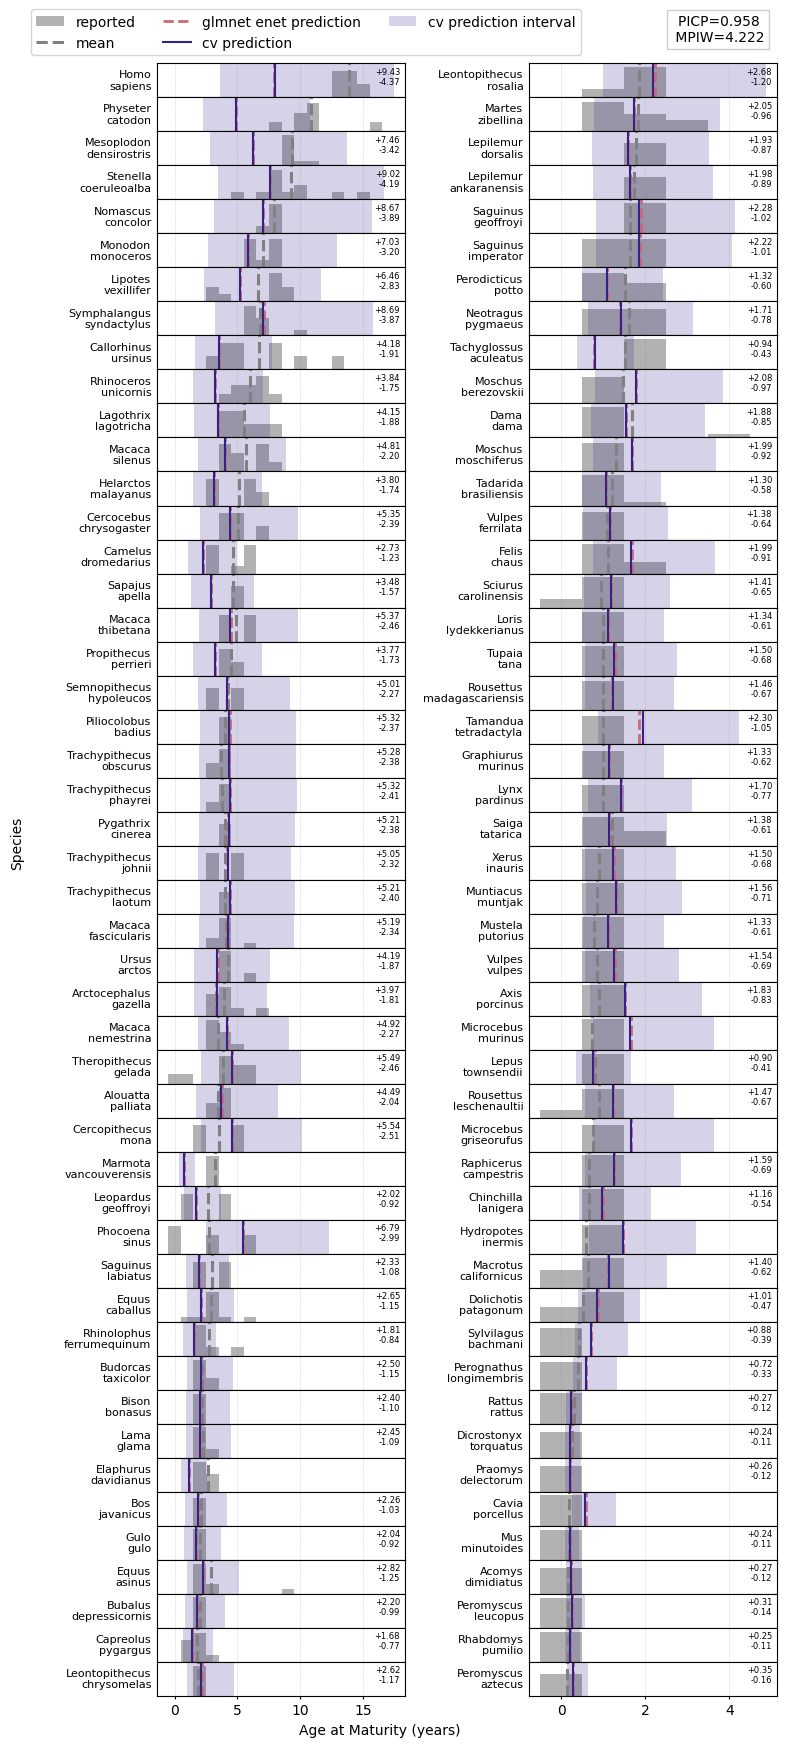

In [4]:
strategy = 'cv'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=f"{plot_dir}/histridge_lifespan_{strategy}.pdf")

PARTITION # 1
PARTITION # 2
PARTITION # 3
PARTITION # 4
PARTITION # 5
PARTITION # 7
PARTITION # 8
PARTITION # 10


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


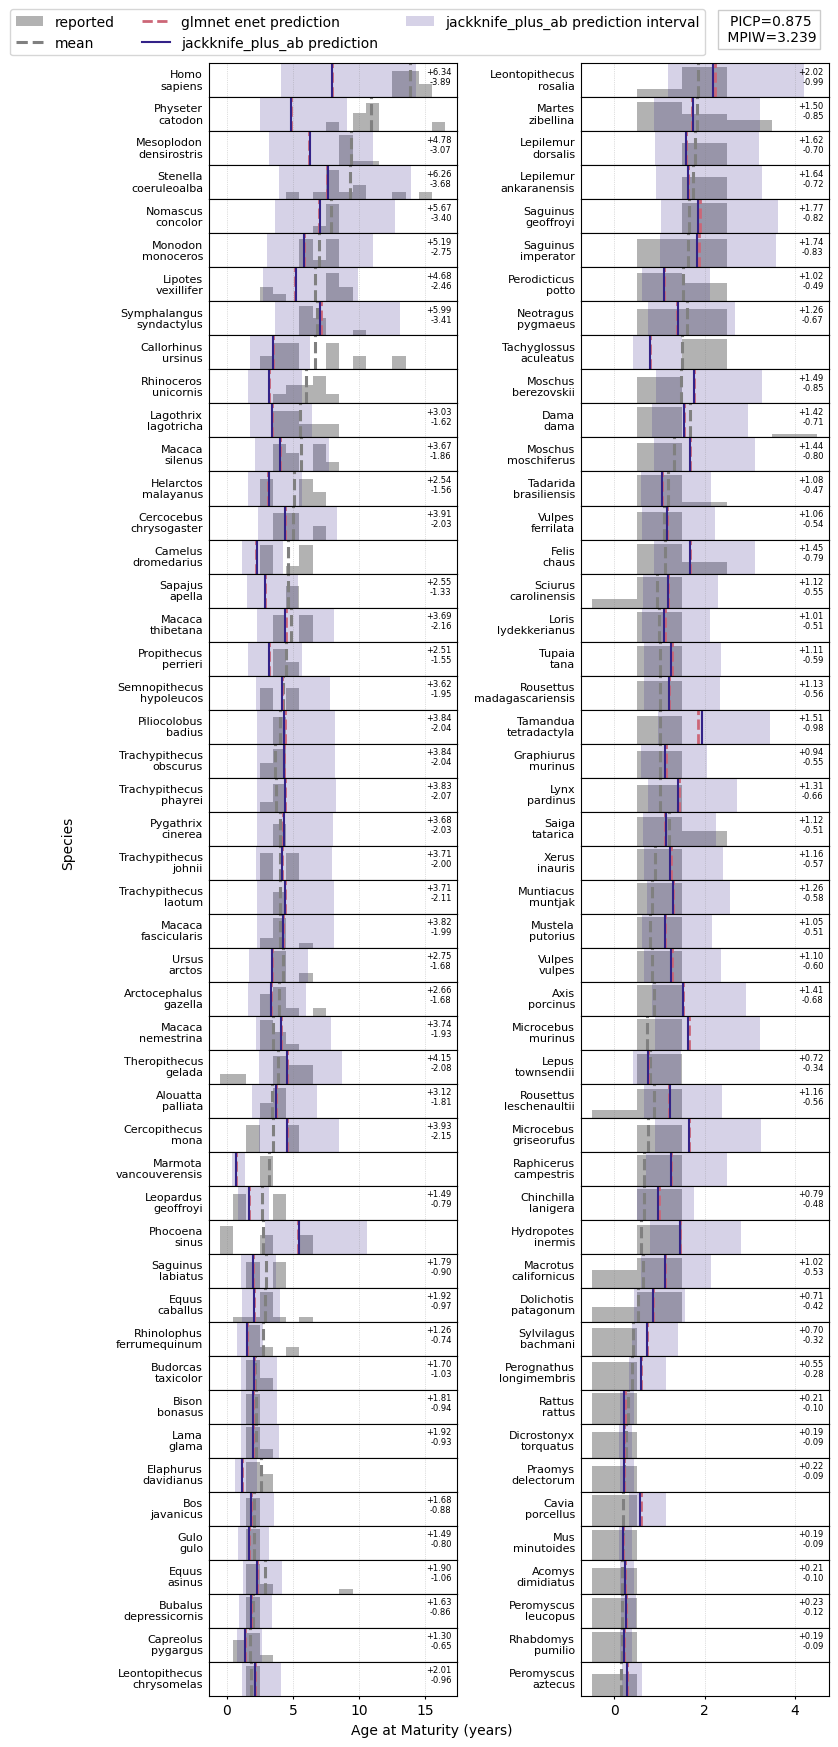

In [5]:
strategy = 'jackknife_plus_ab'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=f"{plot_dir}/histridge_lifespan_{strategy}.pdf")

PARTITION # 1
PARTITION # 2
PARTITION # 3
PARTITION # 4
PARTITION # 5
PARTITION # 7
PARTITION # 8
PARTITION # 10


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


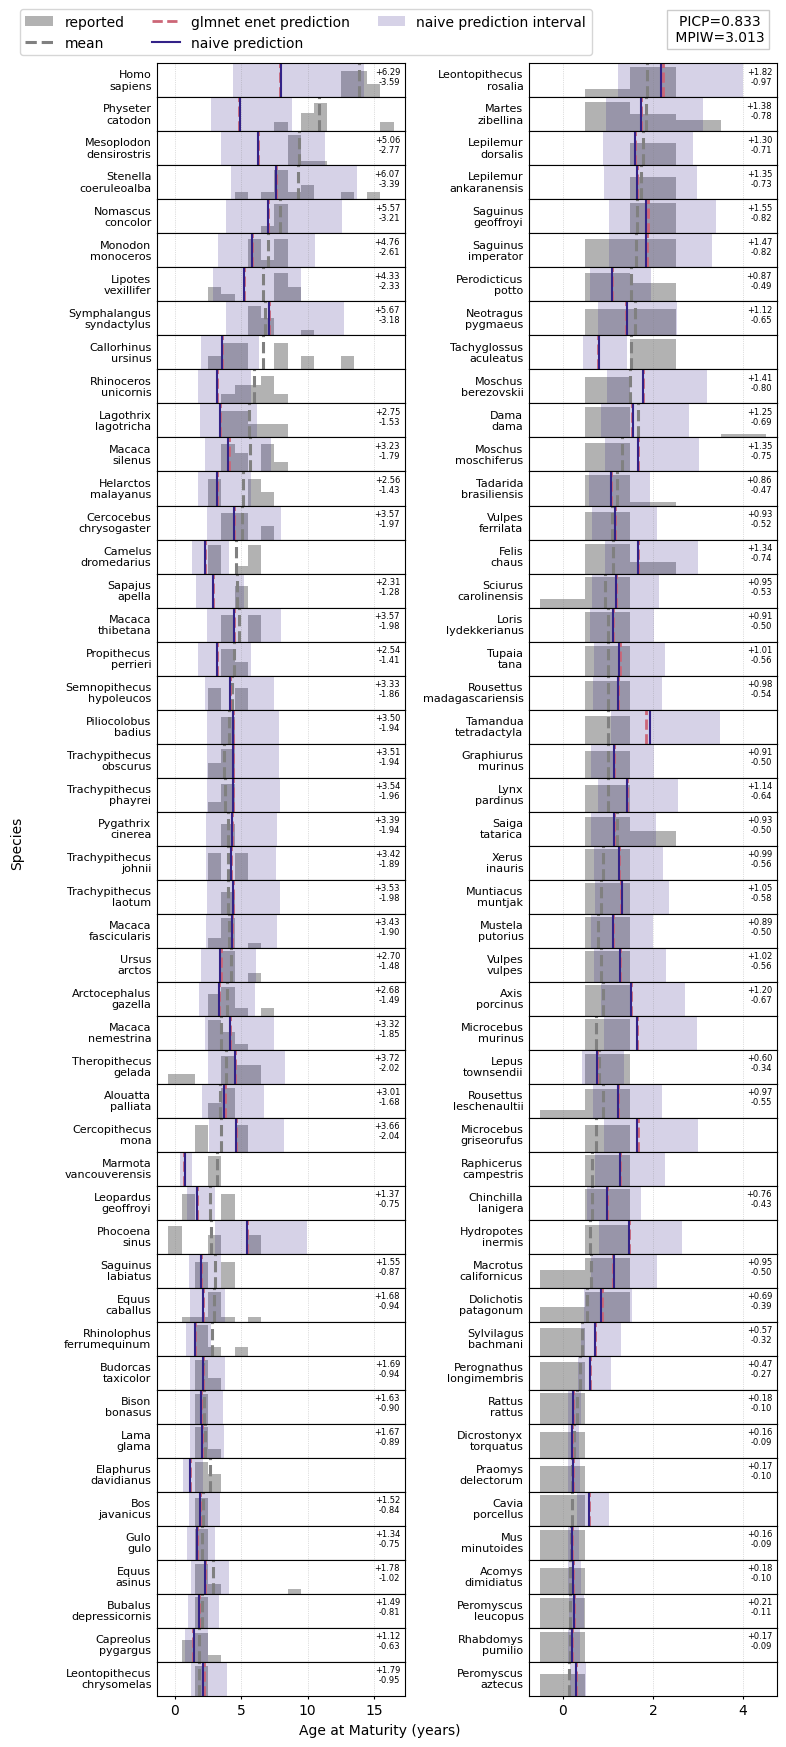

In [6]:
strategy = 'naive'
df_data_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=0, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_data_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=f"{plot_dir}/histridge_lifespan_{strategy}.pdf")

## Selected Data Partition

PARTITION # 1


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


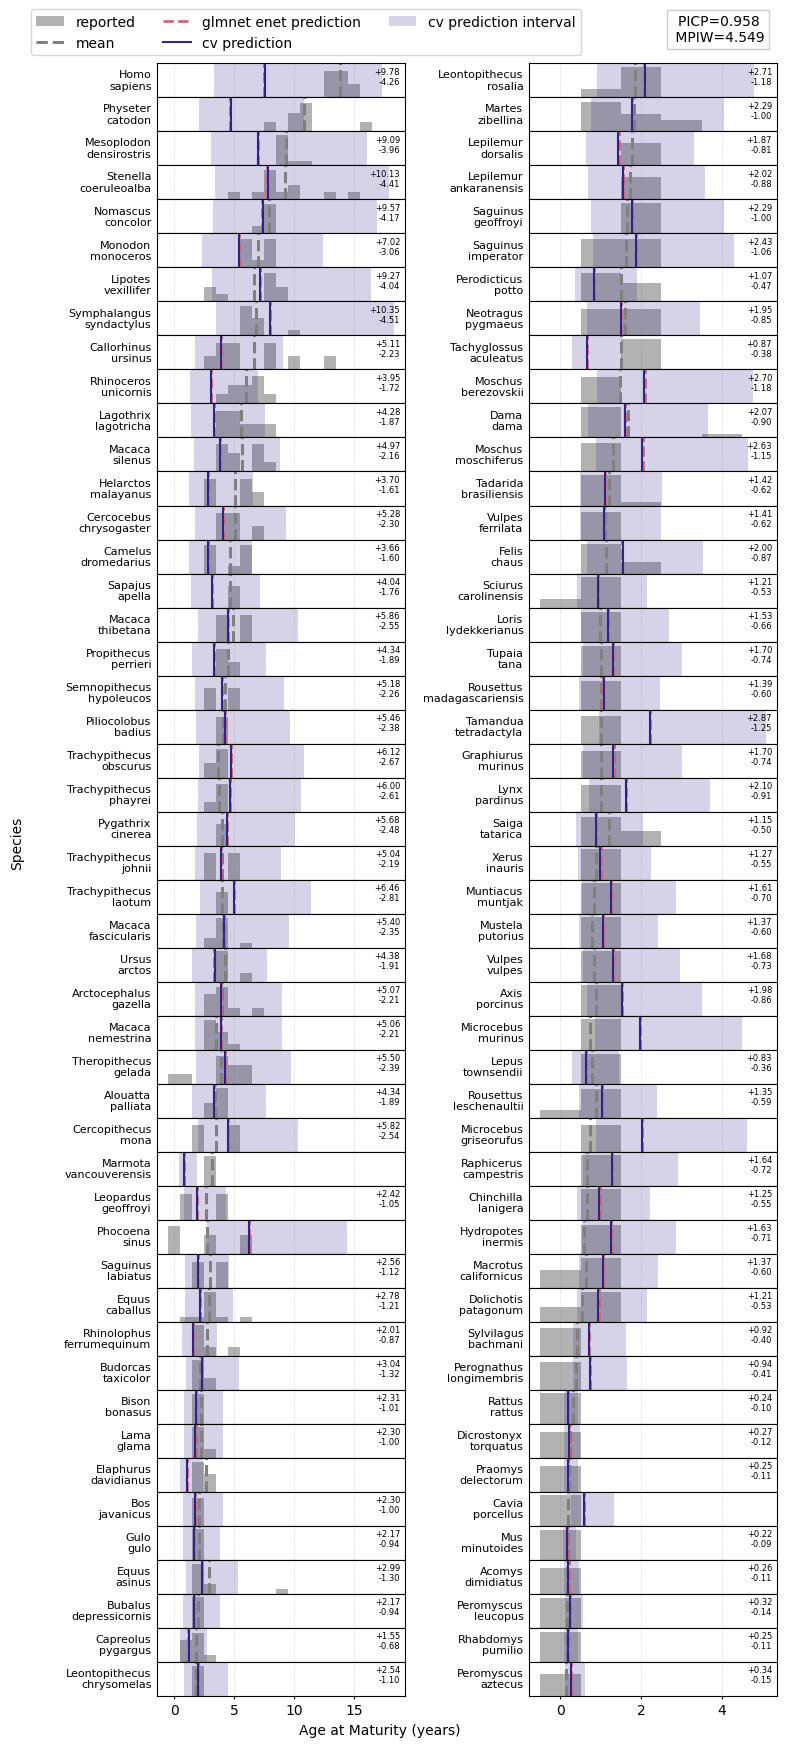

In [7]:
strategy = 'cv'
file_nsplit = 1
df_datapart_test = generate_pi.get_dftest(data_dir=data_dir, filename=cfg['filename'], file_nsplit=file_nsplit, output_dir=output_dir, y_labelname=cfg['y_labelname'], strategy=strategy, alpha=cfg['alpha'])
plot_utils.histridgeline_lifespanpi(df_datapart_test, y_labelname=cfg['y_labelname'], df_datareport=df_datareport, use_baggedpred=False, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=False)

# Prediction Errors for Species with Unknown Ages at Maturity

In [4]:
cfg_pred = get_config(config_pred_filepath)
data_pred_dir = Path('..', cfg_pred['data_dir'])
output_pred_dir = Path('..', cfg_pred['output_dir'])

Load config file >> ../config/config_pred_mammalshomo.yaml


/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


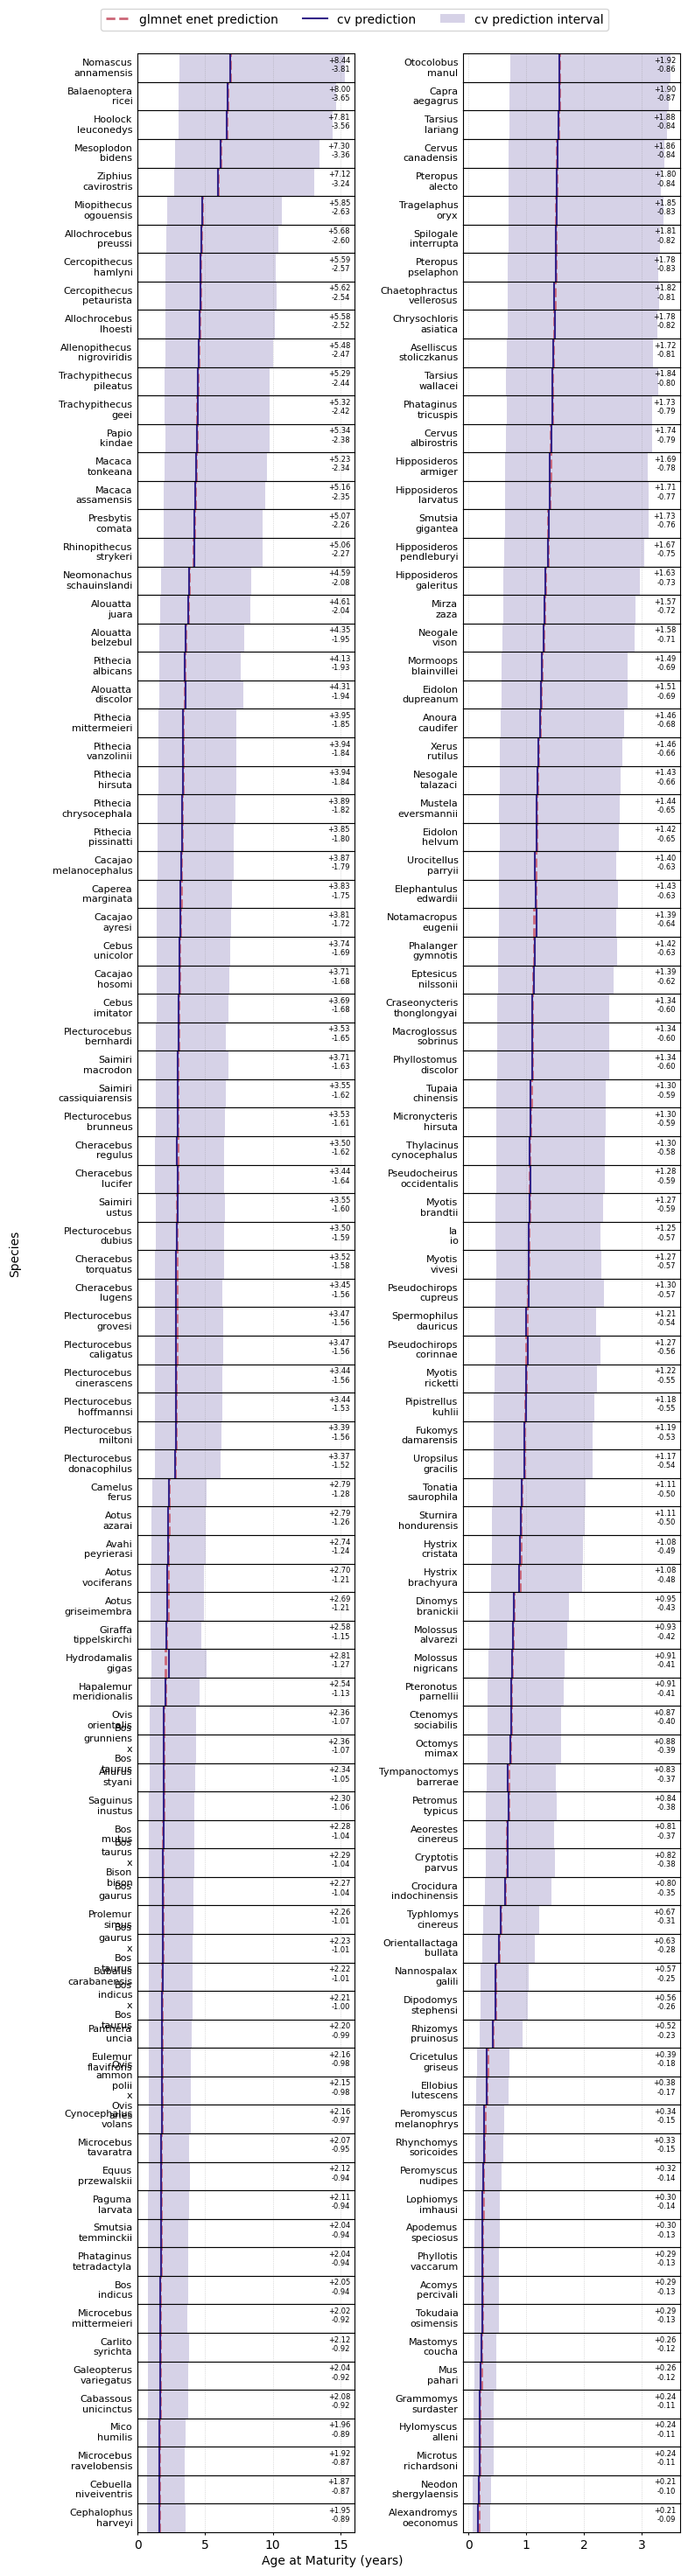

In [5]:
strategy = 'cv'
df_data_pred = pd.read_csv(Path(output_pred_dir, f"mapie_{strategy}_medianpred_alpha{cfg_pred['alpha']}.csv"))
plot_utils.histridgeline_lifespanpi(df_data_pred, y_labelname=cfg_pred['y_labelname'], use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=f"{plot_dir}/histridge_lifespan_unknown_{strategy}.pdf")

/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


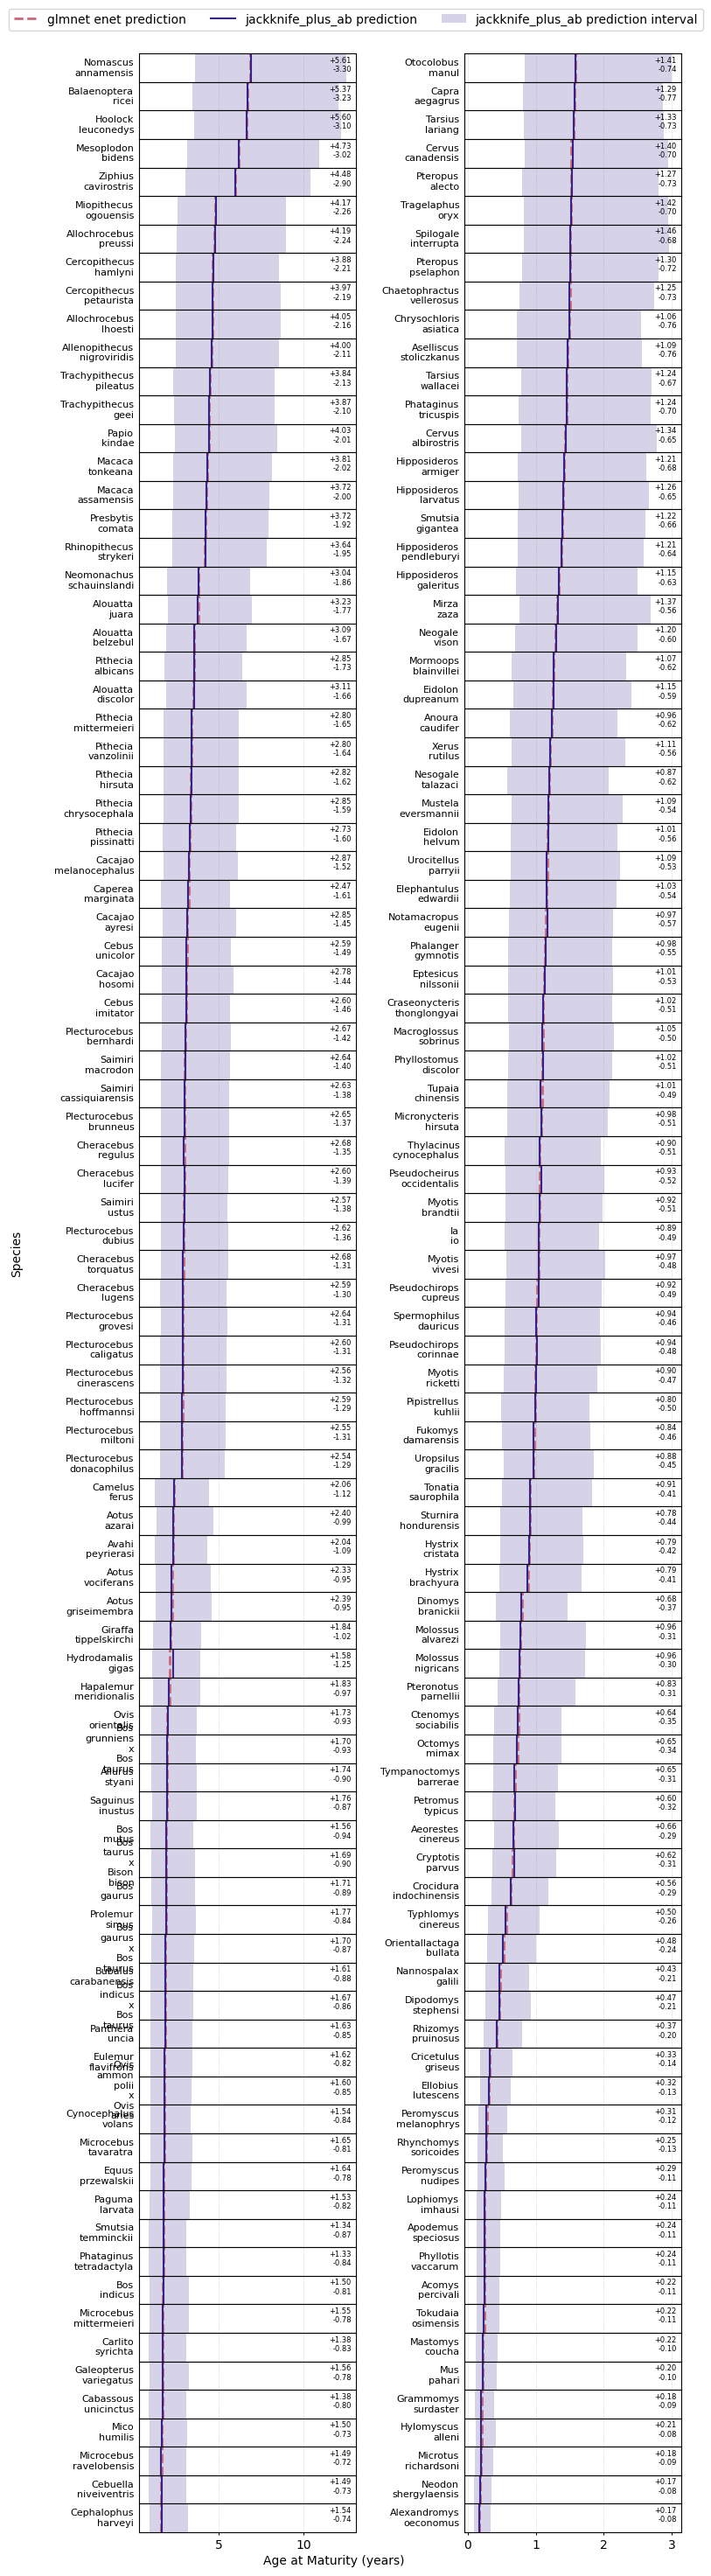

In [5]:
strategy = 'jackknife_plus_ab'
df_data_pred = pd.read_csv(Path(output_pred_dir, f"mapie_{strategy}_medianpred_alpha{cfg_pred['alpha']}.csv"))
plot_utils.histridgeline_lifespanpi(df_data_pred, y_labelname=cfg_pred['y_labelname'], use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=f"{plot_dir}/histridge_lifespan_unknown_{strategy}.pdf")

/Users/yon012/Library/CloudStorage/OneDrive-CSIRO/062023-X - Machine Learning Specialist CSIRO/ProjectCode/SCCP/SCCP2023H2/life_pi/notebooks/../life_pi/lib/plot_utils.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


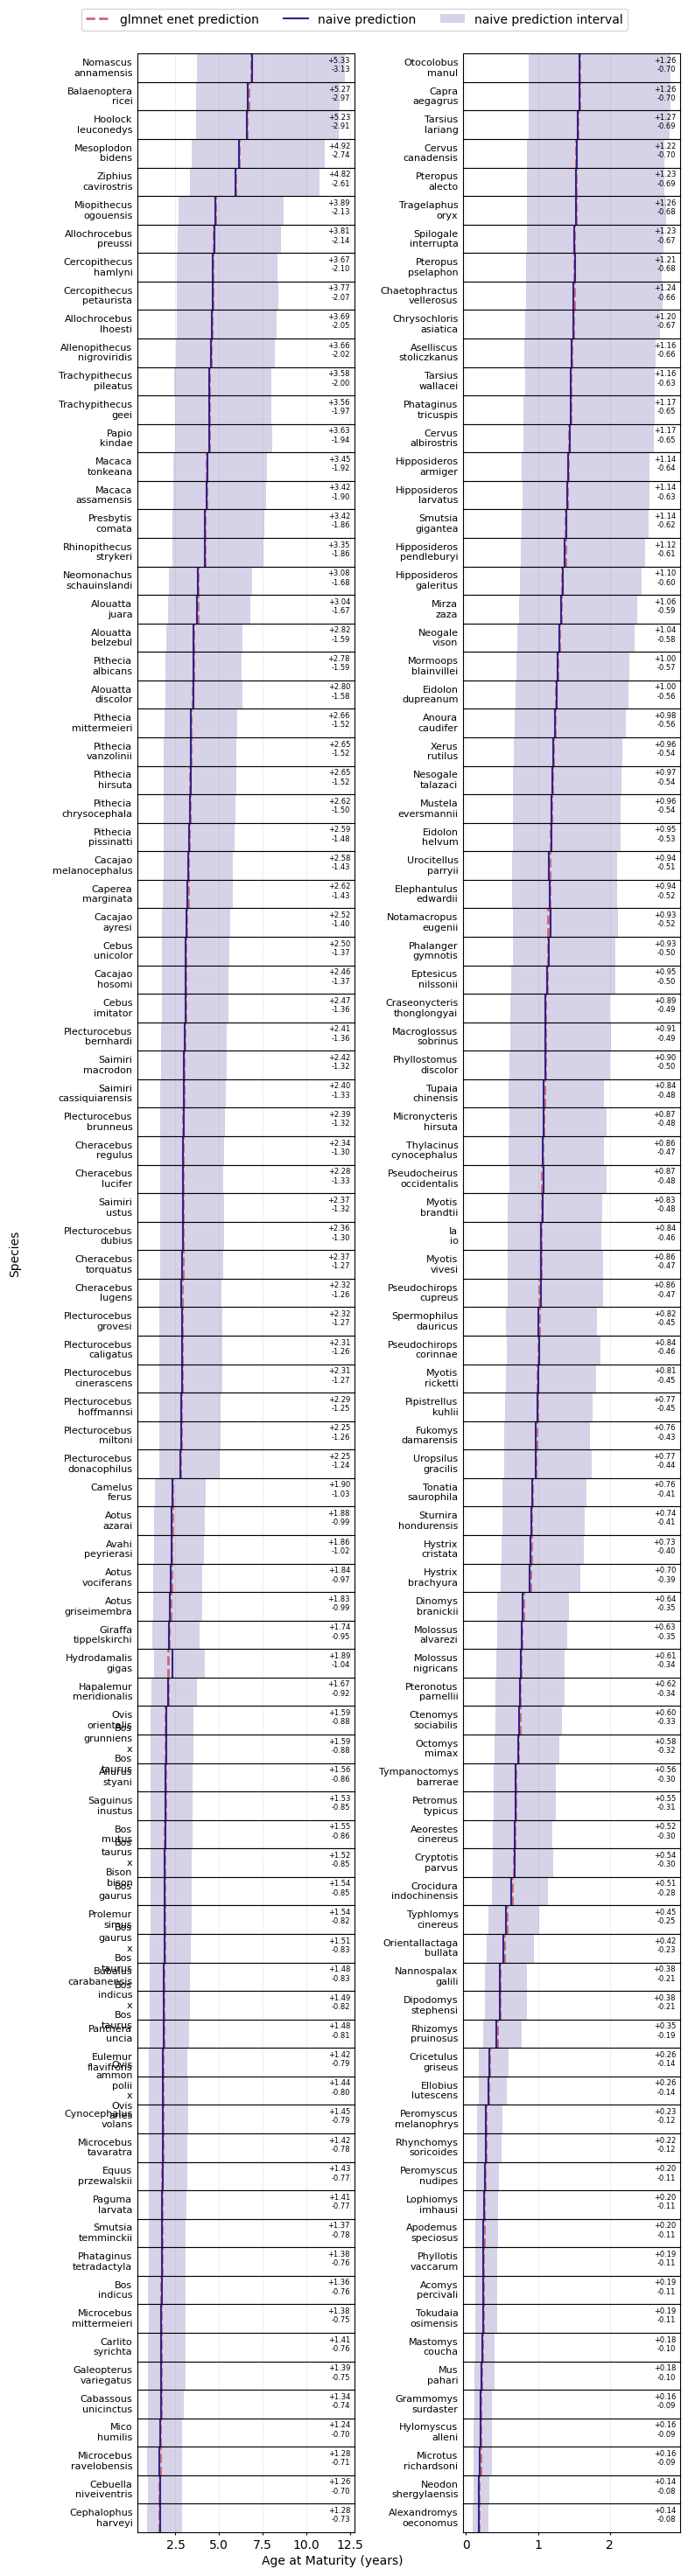

In [6]:
strategy = 'naive'
df_data_pred = pd.read_csv(Path(output_pred_dir, f"mapie_{strategy}_medianpred_alpha{cfg_pred['alpha']}.csv"))
plot_utils.histridgeline_lifespanpi(df_data_pred, y_labelname=cfg_pred['y_labelname'], use_baggedpred=True, strategy=strategy, ylabel='Age at Maturity (years)', save_plotname=f"{plot_dir}/histridge_lifespan_unknown_{strategy}.pdf")